In [1]:
# need to install xgboost library

In [6]:
import pandas as pd
import xgboost as xgb  # import xgboost
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=8, noise=10, random_state=42)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,      # Number of trees (boosting rounds)
    learning_rate=0.1,     # Step size shrinkage to prevent overfitting
    max_depth=5,           # Maximum depth of a tree
    objective='reg:squarederror',   # objective='reg:squarederror' is standard for regression tasks
    random_state=42,
    n_jobs=-1              # Use all available cores
)

In [12]:
#Train the model
xgb_reg.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [17]:
import numpy as np
y_pred = xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 721.1113
Root Mean Squared Error (RMSE): 26.8535
R-squared (R2) Score: 0.9420


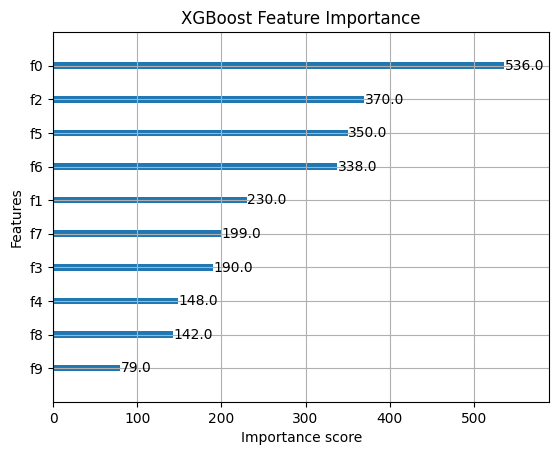

In [18]:
# Visualize Feature Importance
# This shows which features contributed most to the prediction
xgb.plot_importance(xgb_reg)
plt.title("XGBoost Feature Importance")
plt.show()